## Loading data

In [5]:
# Loading the IPython extention autoreload.
%load_ext autoreload

In [6]:
# Reloading edited module without restarting the kernel.
# Referring to https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart
%autoreload

from utils import *

path_to_train_and_dev = '../../data/first-round/train_and_dev_set'
path_to_test = '../../data/first-round/test_set'
ratio_of_training_data = 0.8
train_set_x, train_set_y, dev_set_x, dev_set_y, test_set_x, files_test = load_data(path_to_train_and_dev, ratio_of_training_data, path_to_test)

In [7]:
print('train x:', len(train_set_x), 'train y', len(train_set_y), 'dev x:', len(
    dev_set_x), 'dev y:', len(dev_set_y), 'test x:', len(test_set_x))

train x: 32 train y 32 dev x: 8 dev y: 8 test x: 10


## Loading and compiling model

In [19]:
%autoreload

from model import *

# Creating model.
model = create_model(input_shape=(train_set_x.shape[1:]), summary=True)

# Instantiating the optimizer.
opt = Adam()

# Determining the loss and metric, and compiling the model.
model.compile(optimizer=opt, loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7500, 4)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7500, 4)           16        
_________________________________________________________________
dropout_3 (Dropout)          (None, 7500, 4)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               136192    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

In [9]:
#Loading weights, if needed.
#model.load_weights("./saved_weights/model-019epochs-0.028val_loss.h5")

## Fitting

In [10]:
# checkpoint
from keras.callbacks import ModelCheckpoint
filepath="./saved_weights/weights-{epoch:003d}epochs-{loss:.3f}loss-{val_loss:.3f}val_loss.h5"
checkpoint = ModelCheckpoint(filepath, save_weights_only=True)
callbacks_list = [checkpoint]

In [11]:
#History_fit = model.fit(train_set_x, train_set_y, batch_size=train_set_x.shape[0], epochs=50, callbacks=callbacks_list, validation_data=(dev_set_x, dev_set_y))
#history_fit = History_fit.history

In [12]:
# Saving history
#import pickle
#with open('./trainHistoryDict', 'wb') as file_pi:
#    pickle.dump(history_fit, file_pi)

## Evaluating the training and dev losses

In [13]:
import pickle
with open('./trainHistoryDict', 'rb') as file_pi:
    history_fit = pickle.load(file_pi)

In [14]:
# Calculating and printing root mean square error of fitting
import numpy as np
rms_train_w_dp_all = np.sqrt(history_fit['loss'])
rms_dev_all = np.sqrt(history_fit['val_loss'])

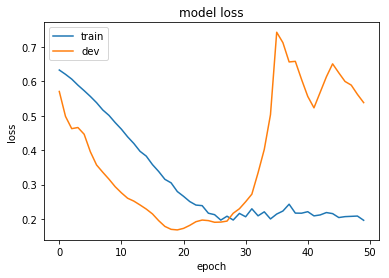

In [15]:
import matplotlib.pyplot as plt
plt.plot(rms_train_w_dp_all)
plt.plot(rms_dev_all)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [16]:
# Determining the best epoch.
min_epoch = np.argmin(rms_dev_all)
print('Lowest loss of dev set occurs at epoch of', min_epoch)

# Loading the corresponding model.
model.load_weights("./saved_weights/weights-019epochs-0.093loss-0.029val_loss.h5")

# Evaluating training set without dropout layer.
ms_train_wo_dp_best = model.evaluate(x=train_set_x, y=train_set_y, batch_size=train_set_x.shape[0])
rms_train_wo_dp_best = np.sqrt(ms_train_wo_dp_best)

print('RMS error of training set of the best fitting:', rms_train_wo_dp_best)
print('RMS error of dev set of the best fitting:', rms_dev_all[min_epoch])

Lowest loss of dev set occurs at epoch of 19
32/32 [==============================] - 2s 75ms/step
RMS error of training set of the best fitting: 0.21721358245555308
RMS error of dev set of the best fitting: 0.1686523963208053


## Predicting

In [17]:
prediction = model.predict(x=test_set_x)

i = 0
for file in files_test:
    print('The prediction of file', file, 'is', prediction[i])
    i += 1

The prediction of file 10_155127.xls is [0.52281076]
The prediction of file 1_10450.xls is [0.5203605]
The prediction of file 2_143535.xls is [0.5211037]
The prediction of file 3_17837.xls is [0.5201449]
The prediction of file 4_175644.xls is [0.5200729]
The prediction of file 5_17747.xls is [0.52208704]
The prediction of file 6_8419.xls is [0.5212268]
The prediction of file 7_161338.xls is [0.51959026]
The prediction of file 8_181928.xls is [0.51985836]
The prediction of file 9_84549.xls is [0.5204056]
